In [69]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Shoppers.csv")

In [70]:
df.head()

,CustID,MoB,MaxBalance,PchActiveMths,FinCharges,OnlineTxn,PaytoBalance,OfflinePay,ActiveCards
0,C#35910567094059,157,315.74,3,11.53,44.73,26.26,1.50,2
1,C#50999939198509,78,227.13,4,11.31,61.76,17.37,1.00,2
2,C#23302753627477,128,137.34,1,1.21,21.74,1.55,0.74,2
3,C#13838886564785,153,161.12,4,12.80,57.39,18.05,1.53,2
4,C#29829517563313,184,328.91,3,24.48,11.28,22.76,39.11,5


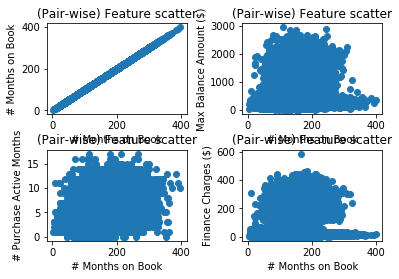

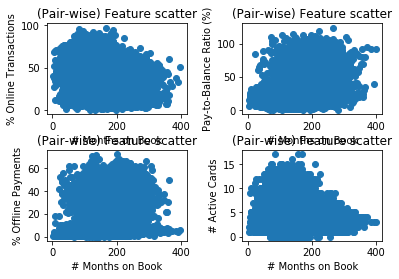

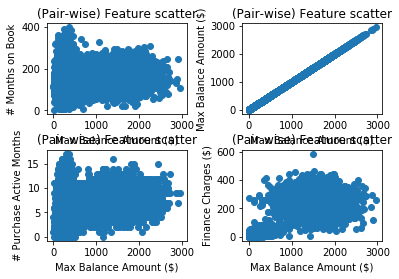

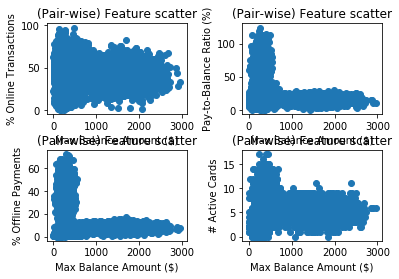

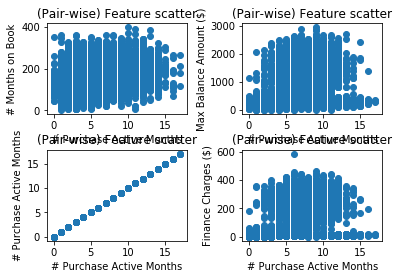

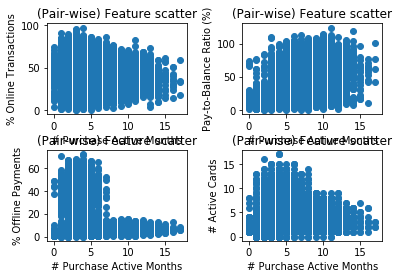

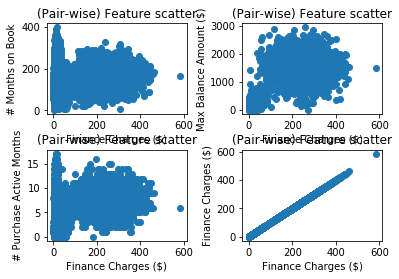

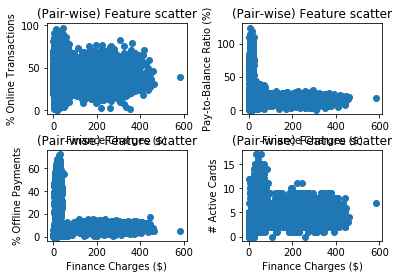

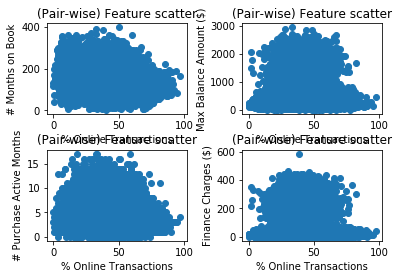

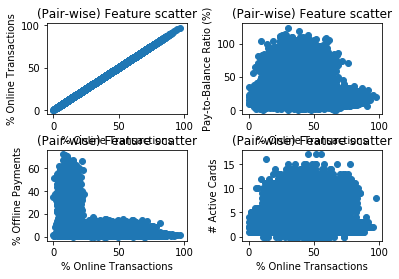

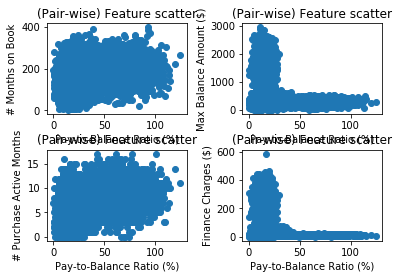

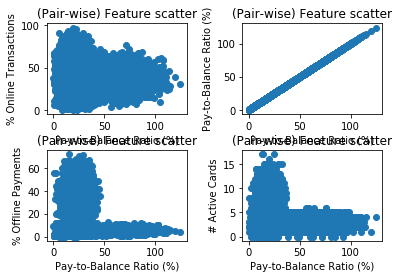

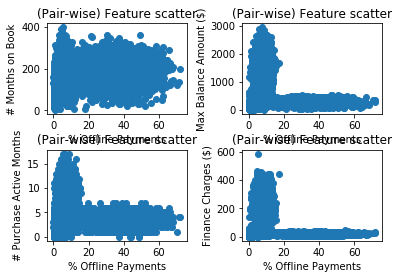

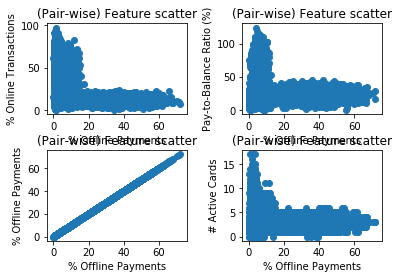

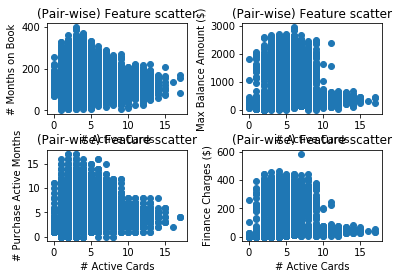

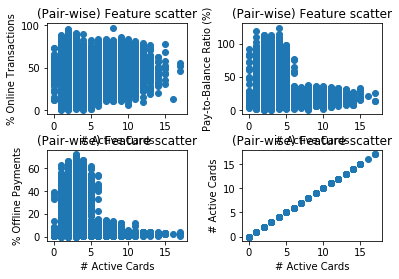

In [71]:
features = ['MoB', 'MaxBalance', 'PchActiveMths', 'FinCharges', 'OnlineTxn', 'PaytoBalance', 'OfflinePay', 'ActiveCards']
feature_names = ['# MoB', 'MaxBalance ($)', '# PchActiveMths', 'FinCharges ($)', '% OnlineTxn', 'PaytoBalance (%)', '% OfflinePay', '# ActiveCards']
feature_longnames = ['# Months on Book', 'Max Balance Amount ($)', '# Purchase Active Months', 'Finance Charges ($)', '% Online Transactions', 'Pay-to-Balance Ratio (%)', '% Offline Payments', '# Active Cards']

# Step 4b:  Draw Scatter plots for each "pair-wise" combination of the Features  
for i in range (8):
    fig = plt.figure()
    fig.subplots_adjust (hspace=0.4, wspace=0.4)
    for j in range (4):
        ax = fig.add_subplot (2, 2, j+1)
        ax.scatter (features [i], features [j], data=df)
        ax.set_xlabel (feature_longnames [i])
        ax.set_ylabel (feature_longnames [j])
        ax.set_title ('(Pair-wise) Feature scatter')
    fig = plt.figure()
    fig.subplots_adjust (hspace=0.4, wspace=0.4)
    for j in range (4):
        ax = fig.add_subplot (2, 2, j+1)
        ax.scatter (features [i], features [j+4], data=df)
        ax.set_xlabel (feature_longnames [i])
        ax.set_ylabel (feature_longnames [j+4])
        ax.set_title ('(Pair-wise) Feature scatter')

In [72]:
X=df.iloc[:,1:]
X

,MoB,MaxBalance,PchActiveMths,FinCharges,OnlineTxn,PaytoBalance,OfflinePay,ActiveCards
0,157,315.74,3,11.53,44.73,26.26,1.50,2
1,78,227.13,4,11.31,61.76,17.37,1.00,2
2,128,137.34,1,1.21,21.74,1.55,0.74,2
3,153,161.12,4,12.80,57.39,18.05,1.53,2
4,184,328.91,3,24.48,11.28,22.76,39.11,5
...,...,...,...,...,...,...,...,...
29365,152,1347.56,9,233.66,62.57,9.23,8.41,5
29366,162,133.39,4,24.21,12.35,29.60,39.26,5
29367,157,169.28,4,13.22,36.22,18.10,1.24,0
29368,73,220.72,3,57.18,53.69,14.68,2.79,9


In [73]:
X=np.array(X)
X

array([[157.  , 315.74,   3.  , ...,  26.26,   1.5 ,   2.  ],
       [ 78.  , 227.13,   4.  , ...,  17.37,   1.  ,   2.  ],
       [128.  , 137.34,   1.  , ...,   1.55,   0.74,   2.  ],
       ...,
       [157.  , 169.28,   4.  , ...,  18.1 ,   1.24,   0.  ],
       [ 73.  , 220.72,   3.  , ...,  14.68,   2.79,   9.  ],
       [103.  , 206.74,   4.  , ...,  23.02,   1.36,   1.  ]])

In [74]:
# Step 5b:  Calculate the means and the standard deviations for each of the Features  
mu = X.mean (axis=0)
sigma = X.std (axis=0)
# Step 5c:  Scale the data to be used for building the Cluster Analysis model  
Xs = (X - mu) / sigma

In [75]:
# Step 6:  Preserve the data scaling parameters in the form of a reusable Scale Matrix  
ScaleMatrix = pd.DataFrame()
ScaleMatrix ['Features'] = features
ScaleMatrix ['Mean'] = mu
ScaleMatrix ['StdDev'] = sigma
ScaleMatrix.to_csv ("Shoppers_Scale Matrix.csv")
print ('Scale Matrix:')
print (ScaleMatrix)
print ('')

Scale Matrix:
        Features        Mean      StdDev
0            MoB  144.686449   51.410328
1     MaxBalance  355.121415  405.656063
2  PchActiveMths    4.068233    2.680878
3     FinCharges   37.933162   70.170425
4      OnlineTxn   40.023305   17.260995
5   PaytoBalance   22.929023   16.371917
6     OfflinePay    7.998980   13.036408
7    ActiveCards    3.465271    2.396805



In [76]:
import numpy as np
# Step 7:  Build the Cluster Analysis models for various numbers of clusters, ranging from a 1-Cluster model through a 12-Cluster model  
# Step 7a:  Define and/or initialize the cluster labels, etc  
n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
iter_cluster_labels = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4', 'Cluster-5', 'Cluster-6', 'Cluster-7', 'Cluster-8', 'Cluster-9', 'Cluster-10', 'Cluster-11', 'Cluster-12']
iter_cluster_sols = ['1-Cluster sol', '2-Cluster sol', '3-Cluster sol', '4-Cluster sol', '5-Cluster sol', '6-Cluster sol', '7-Cluster sol', '8-Cluster sol', '9-Cluster sol', '10-Cluster sol', '11-Cluster sol', '12-Cluster sol']
inertia = np.zeros (12)
size = np.zeros ((12,12))

In [77]:
# Step 7b:  Iterate the Cluster Analysis over the various numbers of clusters, ranging from a 1-Cluster model through a 12-Cluster model  
from sklearn.cluster import KMeans
for i in range (12):
    algorithm = KMeans (n_clusters=n_clusters [i], init='k-means++')
    model = algorithm.fit (Xs)
    labels = algorithm.labels_
    cluster_count = len (np.unique (labels))
    inertia [i] = algorithm.inertia_
    #print (K-Means - ', cluster_count, 'Clusters:', '% Variation | within:', 100*inertia [i]/inertia[0], '  versus  between:', 100 - 100*inertia[i]/inertia[0])
    print("K-Means -", cluster_count, 'Clusters:', '% Variation | within:', 100*inertia [i]/inertia[0], '  versus  between:', 100 - 100*inertia[i]/inertia[0])

    for k in np.unique (labels):
        is_class_member = (labels==k)
        class_sample = X [is_class_member]
        size [i,k] = len (class_sample)


K-Means - 1 Clusters: % Variation | within: 100.0   versus  between: 0.0
K-Means - 2 Clusters: % Variation | within: 74.79789814737313   versus  between: 25.202101852626868
K-Means - 3 Clusters: % Variation | within: 52.71907756936047   versus  between: 47.28092243063953
K-Means - 4 Clusters: % Variation | within: 38.59891627455585   versus  between: 61.40108372544415
K-Means - 5 Clusters: % Variation | within: 28.211027696277217   versus  between: 71.78897230372279
K-Means - 6 Clusters: % Variation | within: 25.617818455967612   versus  between: 74.38218154403239
K-Means - 7 Clusters: % Variation | within: 24.316964047352766   versus  between: 75.68303595264723
K-Means - 8 Clusters: % Variation | within: 23.097546121995777   versus  between: 76.90245387800422
K-Means - 9 Clusters: % Variation | within: 22.06044602211559   versus  between: 77.93955397788442
K-Means - 10 Clusters: % Variation | within: 21.25826135240308   versus  between: 78.74173864759692
K-Means - 11 Clusters: % Varia

In [78]:

# Step 8:  Explore the Cluster Analysis models for the various numbers of clusters  
# Step 8a:  Examine the sizes of the various clusters, for each iteration (i.e., ranging from a 1-Cluster model through a 12-Cluster model)  
ClusterSizes = pd.DataFrame()
ClusterSizes ['Solution'] = iter_cluster_sols
for p in range(12):
    ClusterSizes [iter_cluster_labels [p]] = size [:,p] / len(Xs) * 100
ClusterSizes.to_csv ("Shoppers_Cluster Sizes.csv")
print('Cluster Sizes:')
print(ClusterSizes)
print ('')


Cluster Sizes:
          Solution   Cluster-1  Cluster-2  Cluster-3  Cluster-4  Cluster-5  \
0    1-Cluster sol  100.000000   0.000000   0.000000   0.000000   0.000000   
1    2-Cluster sol   35.461355  64.538645   0.000000   0.000000   0.000000   
2    3-Cluster sol   64.794007   9.186244  26.019748   0.000000   0.000000   
3    4-Cluster sol   64.804222  15.182159   9.189649  10.823970   0.000000   
4    5-Cluster sol   51.712632  15.199183   9.135172  13.077971  10.875043   
5    6-Cluster sol   26.169561  25.944842  10.854614   9.135172  15.059585   
6    7-Cluster sol   16.591760  19.278175  12.659176   9.141982  10.772898   
7    8-Cluster sol   18.505277   9.141982  12.645557   7.466803  16.966292   
8    9-Cluster sol   18.345250  12.665986   7.705141   5.468165   9.138577   
9   10-Cluster sol   17.977528   7.701736   4.225400  16.077630  12.618318   
10  11-Cluster sol    7.412326  18.049030   4.211781   5.417092   7.500851   
11  12-Cluster sol   14.395642  10.796731   4.943

In [79]:
# Step 8b:  Examine the variation in the intra-cluster homogeneity as well as the inter-cluster heterogeneity, as the number of clusters in the model increases  
withinss = 100 * inertia / inertia [0]
betweenss = 100 - withinss
Scree = pd.DataFrame()
Scree ['Solution'] = iter_cluster_sols
Scree ['% Within-Cluster variation'] = withinss
Scree ['% Between-Cluster variation'] = betweenss
Scree.to_csv ("Shoppers_Scree.csv")
print('Scree:')
print (Scree)
print ('')

Scree:
          Solution  % Within-Cluster variation  % Between-Cluster variation
0    1-Cluster sol                  100.000000                     0.000000
1    2-Cluster sol                   74.797898                    25.202102
2    3-Cluster sol                   52.719078                    47.280922
3    4-Cluster sol                   38.598916                    61.401084
4    5-Cluster sol                   28.211028                    71.788972
5    6-Cluster sol                   25.617818                    74.382182
6    7-Cluster sol                   24.316964                    75.683036
7    8-Cluster sol                   23.097546                    76.902454
8    9-Cluster sol                   22.060446                    77.939554
9   10-Cluster sol                   21.258261                    78.741739
10  11-Cluster sol                   20.453236                    79.546764
11  12-Cluster sol                   19.721472                    80.278528



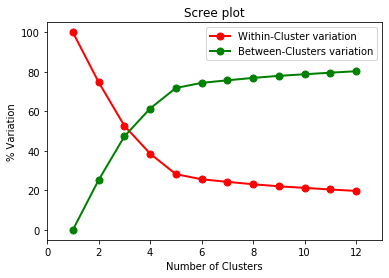

In [80]:
# Step 8c:  Visualize the variation in the intra-cluster homogeneity as well as the inter-cluster heterogeneity, as the number of clusters in the model increases  
fig = plt.figure()
ax = fig.add_subplot (1,1,1)
ax.plot (n_clusters, withinss, c='r', marker='o', markersize=7, linewidth=2, label='Within-Cluster variation')
ax.plot (n_clusters, betweenss, c='g', marker='o', markersize=7, linewidth=2, label='Between-Clusters variation')
ax.set_xlabel ('Number of Clusters')
ax.set_ylabel ('% Variation')
ax.set_title ('Scree plot')
ax.set_xlim (0, 13)
ax.set_ylim (-5, 105)
ax.legend (loc="best")

In [81]:
# Step 9:  Build the Cluster Analysis model, with 6 clusters  
# Step 9a:  Build the Cluster Analysis model  
algorithm =KMeans (n_clusters=6, init='k-means++')
model = algorithm.fit (Xs)

In [82]:
# Step 9b:  Capture the number of clusters into which the model has segregated the data  
labels = algorithm.labels_
cluster_count = len (np.unique(labels))
print ('K-Means - ', cluster_count, 'Clusters')

# Step 9c:  Capture (and "de-scale") the centroids of each of the clusters identified by the model  

centroids = algorithm.cluster_centers_
Centroids = (centroids * sigma) + mu
Centroids = Centroids.T

K-Means -  6 Clusters


In [83]:
# Step 9c:  Capture (and "de-scale") the centroids of each of the clusters identified by the model  

centroids = algorithm.cluster_centers_
Centroids = (centroids * sigma) + mu
Centroids = Centroids.T

In [84]:
# Step 10:  Explore the results of the Cluster Analysis model  
# Step 10a:  Define the labels (i.e., the "identifiers") for the various clusters  
cluster_labels = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4', 'Cluster-5', 'Cluster-6']

In [91]:
# Step 10b:  Preserve the "scaled" centroids of each of the clusters identified by the model, in the form of a reusable Cluster Model  
from pandas import DataFrame
ClusterMODEL = DataFrame()
ClusterMODEL ['Features'] = feature_names
centroids = centroids.T
for k in range (cluster_count):
    ClusterMODEL [cluster_labels [k]] = centroids [:,k]
ClusterMODEL.to_csv ("Shoppers_Cluster MODEL.csv")
print('Cluster MODEL:')
print(ClusterMODEL)
print(' ')

Cluster MODEL:
           Features  Cluster-1  Cluster-2  Cluster-3  Cluster-4  Cluster-5  \
0             # MoB   1.082380  -0.418437  -0.387148   0.788587   0.370007   
1    MaxBalance ($)  -0.165393  -0.449014  -0.419462  -0.199854   2.865226   
2   # PchActiveMths   1.776115  -0.622291  -0.530959  -0.175517   1.365978   
3    FinCharges ($)  -0.368359  -0.402642  -0.377063  -0.243997   2.940177   
4       % OnlineTxn  -0.093860  -0.239261   1.024877  -1.647273   0.044090   
5  PaytoBalance (%)   2.451495  -0.416727  -0.336614   0.003548  -0.478501   
6      % OfflinePay  -0.159269  -0.507680  -0.510551   2.217952   0.020615   
7     # ActiveCards  -0.174110  -0.549453  -0.561095  -0.181761   0.711207   

   Cluster-6  
0  -0.469576  
1   0.097488  
2   0.070921  
3   0.087452  
4   0.371177  
5  -0.209515  
6  -0.414598  
7   2.111236  
 


In [94]:
# Step 10c:  Construct the Cluster Profiles matrix from the "de-scaled" centroids of each of the clusters identified by the model  
ClusterProfiles = DataFrame()
ClusterProfiles ['Features'] = feature_names
for j in range (cluster_count):
    ClusterProfiles [cluster_labels [j]] = Centroids [:,j]
ClusterProfiles.to_csv ("Shoppers_Cluster Profiles.csv")
print ('Cluster Profiles:')
print( ClusterProfiles)
print( ' ')


Cluster Profiles:
           Features   Cluster-1   Cluster-2   Cluster-3   Cluster-4  \
0             # MoB  200.331975  123.174484  124.783032  185.227951   
1    MaxBalance ($)  288.028806  172.976052  184.964064  274.049358   
2   # PchActiveMths    8.829781    2.399947    2.644797    3.597693   
3    FinCharges ($)   12.085238    9.679624   11.474477   20.811814   
4       % OnlineTxn   38.403194   35.893431   57.713694   11.589740   
5  PaytoBalance (%)   63.064702   16.106397   17.418002   22.987119   
6      % OfflinePay    5.922680    1.380654    1.343223   36.913107   
7     # ActiveCards    3.047962    2.148338    2.120437    3.029625   

     Cluster-5   Cluster-6  
0   163.708644  120.545406  
1  1517.417556  394.668072  
2     7.730253    4.258364  
3   244.246658   44.069705  
4    40.784344   46.430183  
5    15.095048   19.498864  
6     8.267727    2.594108  
7     5.169896    8.525491  
 


In [99]:

# Step 10d:  Compare the Cluster Profiles (i.e., the centroids of the various clusters) with the overall data  
ClusterProfilesRelative = DataFrame()
ClusterProfilesRelative ['Features'] = feature_names
ClusterProfilesRelative ['Total'] = np.array (df.mean())
for i in range (len (cluster_labels)):
    ClusterProfilesRelative [cluster_labels [i]] = ClusterProfiles [cluster_labels [i]]
ClusterProfilesRelative.to_csv ("Shoppers_Cluster Profiles (Relative).csv")
print ('Cluster Profiles (Relative):')
print (ClusterProfilesRelative)
print (' ')

Cluster Profiles (Relative):
           Features       Total   Cluster-1   Cluster-2   Cluster-3  \
0             # MoB  144.686449  200.331975  123.174484  124.783032   
1    MaxBalance ($)  355.121415  288.028806  172.976052  184.964064   
2   # PchActiveMths    4.068233    8.829781    2.399947    2.644797   
3    FinCharges ($)   37.933162   12.085238    9.679624   11.474477   
4       % OnlineTxn   40.023305   38.403194   35.893431   57.713694   
5  PaytoBalance (%)   22.929023   63.064702   16.106397   17.418002   
6      % OfflinePay    7.998980    5.922680    1.380654    1.343223   
7     # ActiveCards    3.465271    3.047962    2.148338    2.120437   

    Cluster-4    Cluster-5   Cluster-6  
0  185.227951   163.708644  120.545406  
1  274.049358  1517.417556  394.668072  
2    3.597693     7.730253    4.258364  
3   20.811814   244.246658   44.069705  
4   11.589740    40.784344   46.430183  
5   22.987119    15.095048   19.498864  
6   36.913107     8.267727    2.594108  
7  

In [102]:

# Step 10e:  Calibrate the Cluster Profiles (i.e., the centroids of the various clusters) as a proportion of the overall data  
ClusterProfilesRelativepct = DataFrame()
ClusterProfilesRelativepct ['Features'] = feature_names
ClusterProfilesRelativepct ['Total'] = 100 * ClusterProfilesRelative ['Total'] / ClusterProfilesRelative ['Total']
for i in range (len (cluster_labels)):
	ClusterProfilesRelativepct [cluster_labels [i]] = 100 * ClusterProfilesRelative [cluster_labels [i]] / ClusterProfilesRelative ['Total']
ClusterProfilesRelativepct.to_csv ("Shoppers_Cluster Profiles (Relative %).csv")
print ('Cluster Profiles (Relative %)')
print (ClusterProfilesRelativepct)
print ( '')

Cluster Profiles (Relative %)
           Features  Total   Cluster-1  Cluster-2   Cluster-3   Cluster-4  \
0             # MoB  100.0  138.459390  85.132012   86.243759  128.020248   
1    MaxBalance ($)  100.0   81.107135  48.708989   52.084739   77.170609   
2   # PchActiveMths  100.0  217.042161  58.992381   65.010946   88.433810   
3    FinCharges ($)  100.0   31.859296  25.517578   30.249198   54.864432   
4       % OnlineTxn  100.0   95.952082  89.681326  144.200219   28.957478   
5  PaytoBalance (%)  100.0  275.043123  70.244585   75.964865  100.253371   
6      % OfflinePay  100.0   74.042941  17.260379   16.792432  461.472663   
7     # ActiveCards  100.0   87.957411  61.996252   61.191079   87.428224   

    Cluster-5   Cluster-6  
0  113.147185   83.314925  
1  427.295424  111.136095  
2  190.015015  104.673563  
3  643.886897  116.177253  
4  101.901490  116.007869  
5   65.833804   85.040096  
6  103.359766   32.430481  
7  149.191684  246.026704  



In [106]:
# Step 10f:  Examine the sizes of the various clusters identified by the model  
mix = np.zeros (6)
for k in np.unique (labels):
	is_class_member = (labels==k)
	class_sample = X [is_class_member]
	mix [k] = len (class_sample)
ClusterMix = DataFrame()
ClusterMix ['Cluster #'] = cluster_labels
ClusterMix ['% Observations'] = 100 * mix / len (Xs)
ClusterMix.to_csv ("Shoppers_Cluster Mix.csv")
print ('Cluster Mix:',ClusterMix)
print ('')

Cluster Mix:    Cluster #  % Observations
0  Cluster-1       10.861423
1  Cluster-2       25.921008
2  Cluster-3       26.200204
3  Cluster-4       15.056180
4  Cluster-5        9.138577
5  Cluster-6       12.822608



([<matplotlib.patches.Wedge at 0x163bf6a7a08>,
 [Text(1.0365812086584334, -0.36810242848454744, 'Cluster-1'),
  Text(0.08134834033902172, -1.096987897619699, 'Cluster-2'),
  Text(-1.0999700372067818, -0.008118943731251087, 'Cluster-3'),
  Text(-0.30617867161999923, 1.0565295173562417, 'Cluster-4'),
  Text(0.5060348298464015, 0.9766927618152618, 'Cluster-5'),
  Text(1.0119488153133436, 0.4312303273030789, 'Cluster-6')],
 [Text(0.5654079319955091, -0.20078314280975315, '10.9%'),
  Text(0.04437182200310275, -0.5983570350652903, '25.9%'),
  Text(-0.5999836566582446, -0.004428514762500593, '26.2%'),
  Text(-0.1670065481563632, 0.576288827648859, '15.1%'),
  Text(0.2760189980980371, 0.5327415064446882, '9.1%'),
  Text(0.5519720810800055, 0.23521654216531573, '12.8%')])

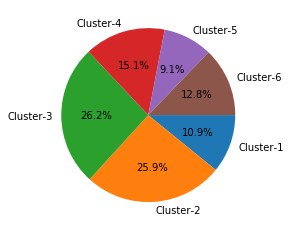

In [107]:

# Step 10g:  Visualize the sizes of the various clusters identified by the model  
fig = plt.figure()
ax = fig.add_subplot (1,1,1)
ax.pie ('% Observations', labels='Cluster #', data=ClusterMix, counterclock=False, autopct='%1.1f%%')

In [111]:
# Step 11:  Visualize the segregation of the values of the Features, across the various clusters identified by the model  
# Step 11a:  Tag each observation in the data with the label of the corresponding cluster, as identified by the model  
ClusterID = np.repeat ('          ', len (Xs))
for i in range (len (Xs)):
	ClusterID [i] = cluster_labels [labels [i]]
df ['ClusterID'] = ClusterID
df.to_csv ("Shoppers (Cluster IDs).csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29370 entries, 0 to 29369
Data columns (total 10 columns):
CustID           29370 non-null object
MoB              29370 non-null int64
MaxBalance       29370 non-null float64
PchActiveMths    29370 non-null int64
FinCharges       29370 non-null float64
OnlineTxn        29370 non-null float64
PaytoBalance     29370 non-null float64
OfflinePay       29370 non-null float64
ActiveCards      29370 non-null int64
ClusterID        29370 non-null object
dtypes: float64(5), int64(3), object(2)
memory usage: 2.2+ MB


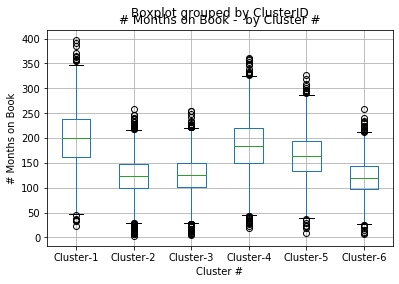

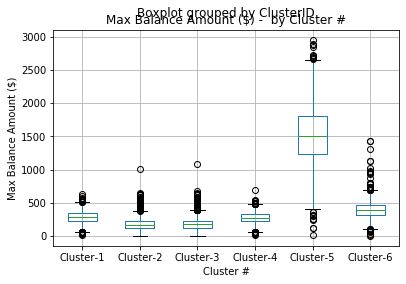

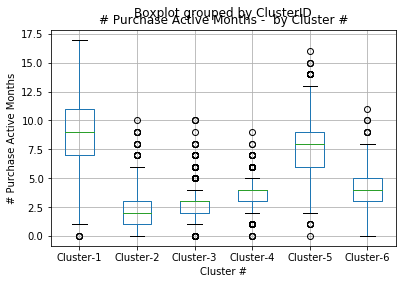

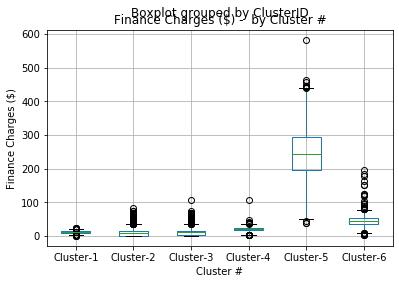

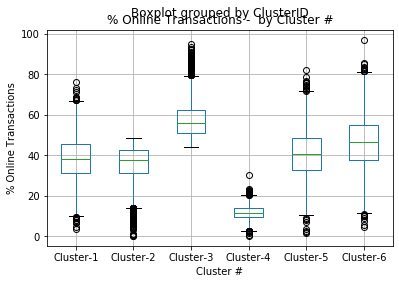

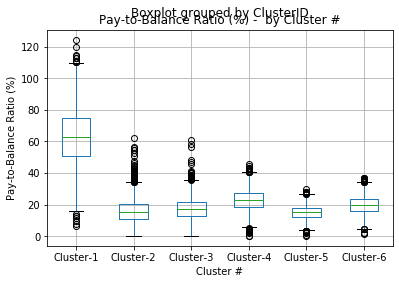

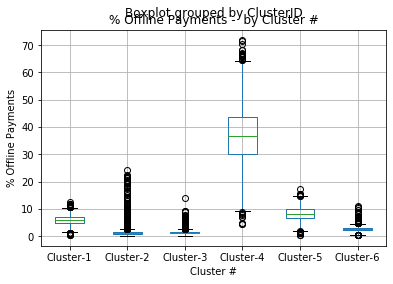

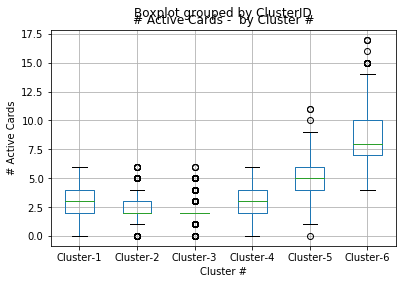

In [114]:
# Step 11b:  Draw Box Plots for each of the Features, grouped by the various clusters identified by the model  
for i in range (8):
	fig = plt.figure()
	ax = fig.add_subplot (1,1,1)
	df.boxplot (features [i], by = 'ClusterID', ax=ax)
	ax.set_xlabel ('Cluster #')
	ax.set_ylabel (feature_longnames [i])
	ax.set_title (str (feature_longnames [i]) + ' -  by Cluster #')

In [118]:
# Step 11c:  Compare the Cluster Profiles (i.e., the centroids of the various clusters) with the average values of the Features (grouped by the various clusters identified by the model)  
cluster_means = df [features].groupby (df ['ClusterID']).mean()
cluster_means = cluster_means.T
print ('Cluster Centroids:')
print( cluster_means)
print ('')
print ('Cluster Profiles:', ClusterProfiles)
print ('')

Cluster Centroids:
ClusterID       Cluster-1   Cluster-2   Cluster-3   Cluster-4    Cluster-5  \
MoB            200.331975  123.276763  124.682261  185.227951   163.708644   
MaxBalance     288.028806  173.008315  184.935261  274.049358  1517.417556   
PchActiveMths    8.829781    2.400368    2.644444    3.597693     7.730253   
FinCharges      12.085238    9.677559   11.476986   20.811814   244.246658   
OnlineTxn       38.403194   35.895122   57.717692   11.589740    40.784344   
PaytoBalance    63.064702   16.107219   17.417530   22.987119    15.095048   
OfflinePay       5.922680    1.381169    1.342704   36.913107     8.267727   
ActiveCards      3.047962    2.148430    2.120338    3.029625     5.169896   

ClusterID       Cluster-6  
MoB            120.545406  
MaxBalance     394.668072  
PchActiveMths    4.258364  
FinCharges      44.069705  
OnlineTxn       46.430183  
PaytoBalance    19.498864  
OfflinePay       2.594108  
ActiveCards      8.525491  

Cluster Profiles:        